# Getting Started with Open AI Gym

## Environment Basics

Open AI Gym allows you to create virtual environments to simulate and agent interacting with the environment in order to create algorithms to control the way the angent behaves.
I this example we will look at the cart pole environment. The goal is to try and balance the pole on the cart (you will see what this looks like at the end of the notebook)

In [48]:
# First import the gym 
import gym

# To create an instance of an environment, use gym.make() with the environment's name
env = gym.make('CartPole-v1')

## The Observation Space

Our agent (in this case the cart, later on our duckiebots) interacts with the environment in a loop of observation, action, and reward. The observation is a piece of information or data about the current state of the environment. It is the information that the agent has about the environment at each step. The "observation space" defines the format and range of possible observations that an agent can expect to receive from the environment.

When you query the `observation_space` of an environment, it tells you the structure of the observations that will be provided to the agent. This is important because the agent's decision-making process depends on understanding what it observes in the environment.

Let's take a closer look at what the observation space represents in our 'CartPole-v1' example:

In [49]:
# To see what the observation space looks like:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


This command will output the structure and bounds of the observation space for the CartPole environment. In Gym environments, observation spaces can be of different types, such as `Discrete` (finite possibilities), `Box` (a n-dimensional box), `Tuple` (a combination of simpler spaces), and others.

For 'CartPole-v1', the observation space is a `Box` type. This means it is an n-dimensional box, so the observations will be an array of numbers representing the quantities of the environment's state. Specifically, for CartPole, it will return an array of 4 numbers, which typically represent:

1. The cart position (a float, which can range from -4.8 to 4.8).
2. The cart velocity (a float, which has no specific limits in the CartPole environment).
3. The angle of the pole with respect to the cart (a float, ranging approximately from -0.418 rad (-24 deg) to 0.418 rad (24 deg)).
4. The rotation rate of the pole (a float, with no specific limits in the CartPole environment).

The bounds of this box are given as high and low values for each component in the state vector. For the CartPole, these bounds are part of the environment's definition and are set to reasonable values that are known to contain all possible states.

Understanding the observation space is crucial for designing the agent's neural network (or any other model) since the input size often matches the dimensionality of the observation space. It also influences preprocessing: knowing the range and type of each observation component can guide how you might normalize or encode the data before feeding it into your algorithm.

## The Action Space

The "action space" defines the set of possible actions that the agent can take in the environment. Each action is a decision made by the agent at each step of interaction, aiming to achieve a goal or maximize cumulative reward over time.

Understanding the action space is crucial because it dictates how the agent can influence the environment. Different environments can have different kinds of action spaces:

- **Discrete action spaces** where the actions are a finite set of distinct values or commands.
- **Continuous action spaces** (also called Box spaces in Gym) where actions are real-valued and can represent things like velocities, torques, or other continuous inputs.
- **MultiDiscrete** or **MultiBinary** spaces for environments where the agent has to take multiple independent actions simultaneously.

For our 'CartPole-v1' environment, the action space consists of two discrete actions:


In [67]:
# To see what the action space looks like:
print(env.action_space)

Discrete(2)


Running this command will output something like `Discrete(2)`. This means there are two possible actions that the agent can take at any given step:

1. `0`: Push the cart to the left
2. `1`: Push the cart to the right

These actions are the only two possibilities the agent can choose from to interact with the environment. When implementing a learning algorithm, the agent will have to decide which action to take based on the observations it receives. The learning part of reinforcement learning refers to improving this decision-making process over time, usually by trial and error.

In the case of a Discrete action space like in 'CartPole-v1', it is common for agents to have a policy that maps observations to actions, choosing an action either deterministically or probabilistically from this set.

For more complex or realistic environments, the action space can be more complicated. However, no matter how complex, the concept remains the same: the action space defines what the agent can do at any given step.

## Resetting the Environment

Before you start interacting with an environment, or at the beginning of a new episode, it is necessary to reset the environment to an initial state. The environment's `reset()` method is responsible for this. Resetting the environment is important for two reasons:

1. **Starting Point:** It provides a clean starting point for the agent to begin a new episode.
2. **Consistency:** It ensures consistency in the starting conditions for each episode, which is important for comparing the performance of different strategies over time.

Here's how you can reset the 'CartPole-v1' environment and inspect the initial observation:

In [51]:
# The environnemt must be reset before it can be used
observation = env.reset()
# To see what the observation space looks like:
print(observation)

[ 0.01838483 -0.02338949 -0.03056394 -0.01980995]


When you call `env.reset()`, it returns the initial observation, which represents the initial state of the environment. In the CartPole environment, this is a 4-dimensional vector corresponding to the position and velocity of the cart, and the angle and rotation rate of the pole.


Running the above commands will reset the environment and print the initial state of the environment. This state is a NumPy array with four numbers. For example, you might see something like `[0.03073904, 0.00145035, 0.04207708, -0.03131252]`. These numbers are sampled from a uniform distribution over a small range, ensuring some variety in the starting conditions of each episode. Here's what each number represents:

1. **Cart Position:** Close to the center of the track.
2. **Cart Velocity:** Near zero, indicating the cart is almost stationary.
3. **Pole Angle:** Slightly tilted from vertical.
4. **Pole Velocity At Tip:** Near zero, suggesting the pole is not rotating significantly.

This initial observation is what the agent uses to decide its first action. After the environment is reset and the initial observation is received, the agent is ready to start the episode and begin the cycle of taking actions and receiving subsequent observations and rewards.

## Taking Actions and Stepping Through the Environment

Once the environment is reset and the agent has an initial observation, the next step is to start interacting with the environment. This interaction happens through a sequence of steps, where the agent takes an action and the environment responds with a new state, a reward, and some additional information.

In [56]:
# To take an action, use the step method which returns four values:
# observation (object), reward (float), done (boolean), info (dict)
action = env.action_space.sample() # take a random action
print(action) 
observation, reward, done, info = env.step(action)

1


Each of these returned values has a specific significance:

1. **observation (object)**: This is the new state of the environment after the action has been taken. It provides the agent with the updated information necessary to decide the next action.

2. **reward (float)**: This is the reward resulting from taking the action. The agent's goal is to maximize the total reward it receives over time. In 'CartPole-v1', the agent receives a reward of 1 for every timestep that the pole remains upright.

3. **done (boolean)**: This flag indicates whether the episode has ended. An episode ends when the agent reaches a terminal state, which in the case of 'CartPole-v1' happens when the pole falls over or the cart moves too far from the center.

4. **info (dict)**: This dictionary can provide auxiliary diagnostic information. In many Gym environments, this is an empty dictionary, but the infrastructure is there to provide more detail in more complex scenarios. The Duckietown environment does provide useful extra information here.

Let's break down the action step more concretely:

- `env.action_space.sample()` is a function provided by Gym that samples an action randomly from the action space of the environment. This is useful, especially when you're testing the environment and want to see how it responds to different actions. We just used random actions for demonstration purposes, you will be creating an algorithm to choose appropriate actions based on the observed state.

- `env.step(action)` is the function that actually executes the action within the environment. You pass in the action that the agent has decided to take (in this case, a random action), and it returns the new observation, the reward received, and whether or not the episode has finished.

By repeatedly calling `env.step(action)` with the agent's chosen actions, you simulate the environment's dynamics and allow the agent to experience a sequence of states, rewards, and decisions, which is how it learns over time.

## The Main Loop

The main loop of the simulation allows the agent to continuously interact with the environment until a terminal state is reached. Here, we will go through the process of setting up and running the main loop with our `CartPole-v1` environment:

In [53]:
# Import the gym module
import gym  

# Create the environment
env = gym.make('CartPole-v1')

# Reset the environment
observation = env.reset()

done = False
# Run the simulation until the episode is done
while not done:
    # Take a random action
    action = env.action_space.sample()

    # print the action and observation in a nice f string
    print(f"Action taken: {action}")
    print(f"Observation: {observation}")

    # Get the new state and reward from the environment
    observation, reward, done, info = env.step(action)

# close the environment
env.close()

Action taken: 0
Observation: [-0.02075791 -0.00784338 -0.04323156  0.00044576]
Action taken: 0
Observation: [-0.02091477 -0.20231952 -0.04322264  0.2791813 ]
Action taken: 0
Observation: [-0.02496116 -0.3967991  -0.03763902  0.5579247 ]
Action taken: 1
Observation: [-0.03289714 -0.591373   -0.02648053  0.8385156 ]
Action taken: 0
Observation: [-0.04472461 -0.39589965 -0.00971021  0.537624  ]
Action taken: 1
Observation: [-0.0526426  -0.59088373  0.00104227  0.8272316 ]
Action taken: 0
Observation: [-0.06446028 -0.39577606  0.0175869   0.53487664]
Action taken: 1
Observation: [-0.0723758  -0.59114087  0.02828443  0.8330488 ]
Action taken: 0
Observation: [-0.08419861 -0.39641657  0.04494541  0.5493937 ]
Action taken: 0
Observation: [-0.09212694 -0.59214014  0.05593328  0.85589206]
Action taken: 0
Observation: [-0.10396975 -0.7879778   0.07305112  1.165625  ]
Action taken: 0
Observation: [-0.1197293  -0.9839706   0.09636363  1.480288  ]
Action taken: 0
Observation: [-0.13940871 -1.1801274

When you run this code, it performs the following steps in the while loop:

1. **Random Action Selection:** At each step, the agent (which is not yet implementing a learning algorithm) selects an action at random from the available action space. This action is then printed for us to see.

2. **Environment Step:** The selected action is applied to the environment using the `env.step(action)` method. This method executes the action and returns the new observation (state of the environment), the reward received for the action, and whether the episode has concluded (`done`).

3. **Episode Termination:** The loop continues until the `done` flag is returned as True, which happens when the pole falls too much, or the cart moves off the center.

4. **Environment Closure:** Finally, after the loop concludes (the episode ends), we clean up by calling `env.close()`. This is good practice as it properly releases the resources the environment may be using.

The primary purpose of this code is to illustrate how the agent-environment interaction loop works. In a more complex implementation, the agent would use observations to decide the next action or learn over time which actions lead to higher rewards, instead of randomly sampling actions.

## Rendering the Environment

In order to see what we are doing we can render the environment in the Jupyter notebook.

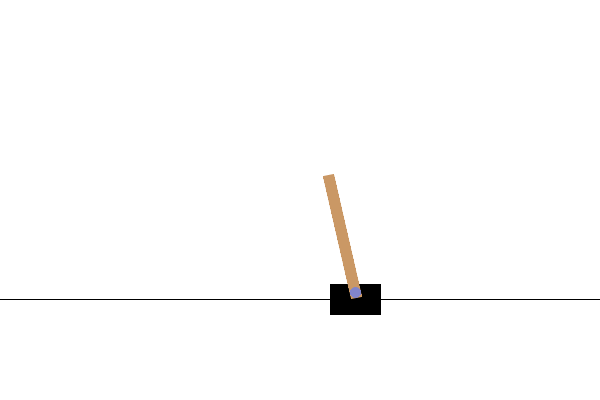

In [61]:
# Import the gym module
import gym  
# required to display the environment in the notebook
from IPython.display import display, clear_output
from PIL import Image

# Helper function to display an image in Jupyter notebook
def show_array(arr):
    img = Image.fromarray(arr, 'RGB')
    display(img)

# Create the environment
env = gym.make('CartPole-v1')

# Reset the environment
observation = env.reset()

done = False
# Run the simulation until the episode is done
while not done:
    # Take a random action
    action = env.action_space.sample()

    # Get the new state and reward from the environment
    observation, reward, done, info = env.step(action)

    # Render the current frame as an rgb array
    frame = env.render(mode='rgb_array')
    # Clear the previous output and display the new frame
    clear_output(wait=True)
    show_array(frame)

# close the environment
env.close()


# Running for a Fixed number of Steps

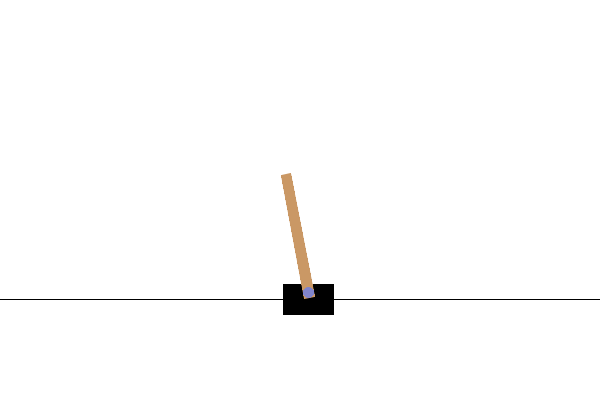

In [62]:
# Import the gym module
import gym  
# required to display the environment in the notebook
from IPython.display import display, clear_output
from PIL import Image

# Helper function to display an image in Jupyter notebook
def show_array(arr):
    img = Image.fromarray(arr, 'RGB')
    display(img)

# Create the environment
env = gym.make('CartPole-v1')

# Reset the environment
observation = env.reset()

done = False
# Run the simulation for x steps
num_steps = 1000
for i in range(num_steps):
    # Take a random action
    action = env.action_space.sample()

    # Get the new state and reward from the environment
    observation, reward, done, info = env.step(action)

    # Render the current frame as an rgb array
    frame = env.render(mode='rgb_array')
    # Clear the previous output and display the new frame
    clear_output(wait=True)
    show_array(frame)

    # If the episode is done, reset the environment
    if done:
        observation = env.reset()

# close the environment
env.close()

## Running for Multiple Episodes

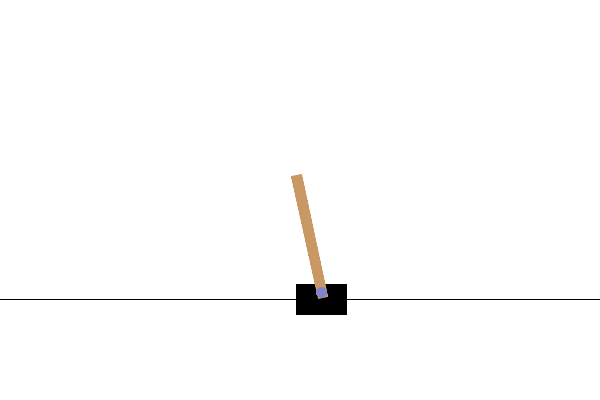

In [66]:
# Import the gym module
import gym  
# required to display the environment in the notebook
from IPython.display import display, clear_output
from PIL import Image

# Helper function to display an image in Jupyter notebook
def show_array(arr):
    img = Image.fromarray(arr, 'RGB')
    display(img)

# Create the environment
env = gym.make('Pendulum-v1')

# Run the simulation for x episodes
num_episodes = 10
for i in range(num_episodes):
    # Reset the environment
    observation = env.reset()
    done = False
    # Run the simulation until the episode is done
    while not done:
        # Take a random action
        action = env.action_space.sample()

        # Get the new state and reward from the environment
        observation, reward, done, info = env.step(action)

        # Render the current frame as an rgb array
        frame = env.render(mode='rgb_array')
        # Clear the previous output and display the new frame
        clear_output(wait=True)
        show_array(frame)

        # If the episode is done, reset the environment
        if done:
            observation = env.reset()

# close the environment
env.close()

# Try this with another Gym Environment

### Here are some you can try:

- MountainCar-v0
- Pendulum-v1
- MountainCarContinuous-v0

Make sure you look at the differences in the observation and action space for these environments.

